# Implementation of Martin's Classen crack orientation concept

In [3]:
import sympy as sp
import numpy as np

<img src="martin concept.png" width="700"/> 

## Symbol representation

In [4]:
sigma_x0, sigma_z0, tau_0 = sp.symbols('sigma_x0, sigma_z0, tau_0')
psi = sp.Symbol(r'\psi')
psi

\psi

## Tranformation of global stresses into cosine components

\begin{align}
\sigma_{x0} = 
\left[
\begin{array}{cc}
\sigma_{x0} \cos \psi \\
\sigma_{x0} \sin \psi \\
\end{array}
\right]
\end{align}

In [5]:
sigma_x0_components = sp.Matrix([sigma_x0 * sp.cos(psi), sigma_x0 * sp.sin(psi)])
sigma_x0_components

Matrix([
[sigma_x0*cos(\psi)],
[sigma_x0*sin(\psi)]])

\begin{align}
\sigma_{z0} = 
\left[
\begin{array}{cc}
\sigma_{z0} \cos \psi \\
\sigma_{z0} \sin \psi \\
\end{array}
\right]
\end{align}

In [6]:
sigma_z0_components = sp.Matrix([sigma_z0 * sp.cos(psi), sigma_z0 * sp.sin(psi)])
sigma_z0_components

Matrix([
[sigma_z0*cos(\psi)],
[sigma_z0*sin(\psi)]])

\begin{align}
\tau_{0} = 
\left[
\begin{array}{cc}
\tau_{0} \cos \psi \\
\tau_{0} \sin \psi \\
\end{array}
\right]
\end{align}

In [7]:
tau_0_components = sp.Matrix([tau_0 * sp.cos(psi), tau_0 * sp.sin(psi)])
tau_0_components

Matrix([
[tau_0*cos(\psi)],
[tau_0*sin(\psi)]])

## Principle Stress tensor

\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{1} & 0 \\
0 & \sigma_{2}
\end{array}
\right]
\end{align}

In [8]:
sigma_1, sigma_2 = sp.symbols('sigma_1, sigma_2')
sigma_ps = sp.Matrix([[sigma_1, 0], [0, sigma_2]])
sigma_ps

Matrix([
[sigma_1,       0],
[      0, sigma_2]])

## Triangle 1

<img src="triangle 1.png" width="400"/> 

## Principle Stress Tensor equivalence from triangle 1

In [9]:
sigma_ps_equiv_1 = sp.simplify(sp.Matrix([[(sigma_z0_components[0] + tau_0_components[1])/sp.cos(psi), 0], 
                            [0, (sigma_z0_components[1] - tau_0_components[0])//sp.sin(psi)]]))
sigma_ps_equiv_1

Matrix([
[sigma_z0 + tau_0*tan(\psi),                                 0],
[                         0, floor(sigma_z0 - tau_0/tan(\psi))]])

In [10]:
sig_ps_1 = sp.Eq(sigma_ps, sigma_ps_equiv_1)
sig_ps_1

Eq(Matrix([
[sigma_1,       0],
[      0, sigma_2]]), Matrix([
[sigma_z0 + tau_0*tan(\psi),                                 0],
[                         0, floor(sigma_z0 - tau_0/tan(\psi))]]))

In [11]:
psi_solved = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), psi)[0]
psi_solved

atan((sigma_1 - sigma_z0)/tau_0)

In [12]:
f_ct = sp.Symbol('f_ct')
psi_subs = psi_solved.subs(sigma_1, f_ct)
psi_subs

atan((f_ct - sigma_z0)/tau_0)

In [13]:
get_psi = sp.lambdify((sigma_1, sigma_z0, tau_0), psi_solved)
get_psi

<function _lambdifygenerated(sigma_1, sigma_z0, tau_0)>

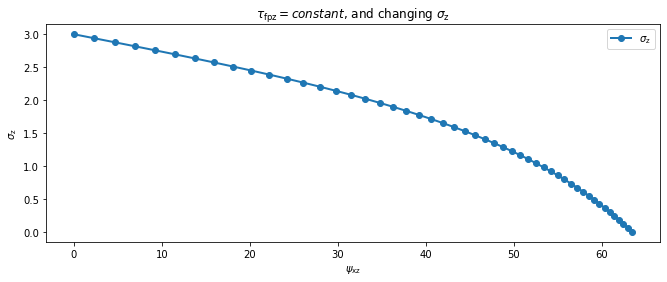

In [14]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
psi_xz = get_psi(f_ct_val, sigma_z, tau_xx)

ax1.plot(psi_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\psi_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'$\tau_{\mathrm{fpz}} = constant$, and changing $\sigma_{\mathrm{z}}$')
ax1.legend()

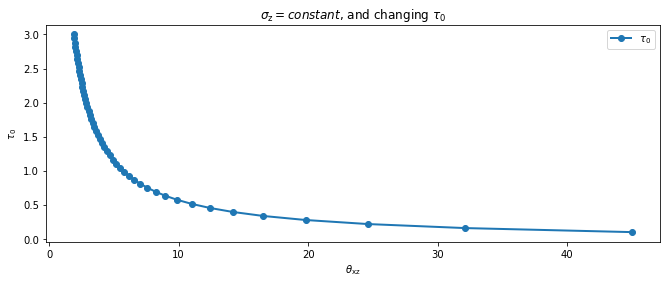

In [15]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sigma_z = 2.9
tau_xx = np.linspace(0.1, 3, 50)
psi_xz = get_psi(f_ct_val, sigma_z, tau_xx)

ax1.plot(psi_xz * 180/ np.pi,  tau_xx, 'o-', lw= 2, label = r'$\tau_{\mathrm{0}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\tau_{\mathrm{0}}$');
ax1.set_title(r'$\sigma_{\mathrm{z}} = constant$, and changing $\tau_{\mathrm{0}}$')
ax1.legend()

In [16]:
f_ct_val = 3
tau_xx_num = 10
tau_xx = np.linspace(0.15,1.5, tau_xx_num)
#eta = 0.2
#tau_xx = eta * f_ct_val
sig_z_num = 10
sigma_z = np.linspace(0, 2.9, sig_z_num)
psi = np.zeros([tau_xx_num, sig_z_num])
for j in  range(len(sigma_z)):
    #print('sigma_z =', sigma_z[j])
    for i in range(len(tau_xx)):
        #print('tau_fpz =', tau_fpz[i])
        psi_xz = get_psi(f_ct_val, sigma_z[j], tau_xx[i])
        psi[j, i] = psi_xz
print(psi * 180/ np.pi) 

[[87.13759477 84.28940686 81.46923439 78.69006753 75.96375653 73.30075577
  70.70995378 68.19859051 65.77225468 63.43494882]
 [86.79383608 83.60762632 80.46058967 77.37054105 74.35334448 71.42252466
  68.58905069 65.86128465 63.24507121 60.74393478]
 [86.35636772 82.74196989 79.18465761 75.70967492 72.33872115 69.08936965
  65.97485162 63.00416161 60.18240836 57.51132349]
 [85.78090465 81.60707481 77.5209282  73.55962048 69.75337992 66.12471915
  62.68846625 59.45242825 56.41844708 53.58362148]
 [84.99012494 80.05570574 75.26559423 70.67681568 66.3315991  62.25679553
  58.46520809 54.9580706  51.72793593 48.76143748]
 [83.83594756 77.8113668  72.04767569 66.63565552 61.63095371 57.05676253
  52.91071946 49.17298448 45.81347567 42.79740184]
 [81.99527114 74.29136217 67.12633481 60.64224646 54.88798882 49.84400038
  45.45113855 41.63353934 38.31309067 35.41705528]
 [78.60786417 68.05130092 58.84797762 51.1322225  44.78700552 39.59620864
  35.33643905 31.8142387  28.87411397 26.39503453]


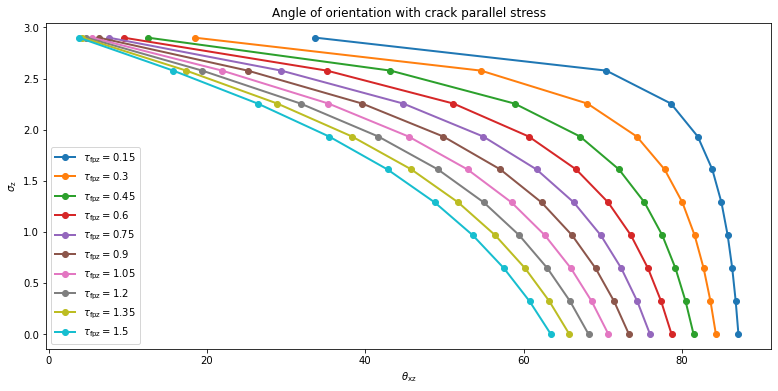

In [17]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(13,6))
ax1.plot(psi[:,0] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.15}$')
ax1.plot(psi[:,1] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.3}$')
ax1.plot(psi[:,2] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.45}$')
ax1.plot(psi[:,3] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.6}$')
ax1.plot(psi[:,4] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.75}$')
ax1.plot(psi[:,5] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 0.9}$')
ax1.plot(psi[:,6] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.05}$')
ax1.plot(psi[:,7] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.2}$')
ax1.plot(psi[:,8] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.35}$')
ax1.plot(psi[:,9] * 180/ np.pi,  sigma_z, 'o-',lw= 2, label = r'$\tau_{\mathrm{fpz}} = 1.5}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()

## Triangle 2

<img src="triangle 2.png" width="300"/> 

## Principle Stress Tensor equivalence from triangle 2

In [18]:
sigma_x0, sigma_z0, tau_0 = sp.symbols('sigma_x0, sigma_z0, tau_0')
psi = sp.Symbol(r'\psi')
sigma_ps_equiv_2 = sp.simplify(sp.Matrix([[(sigma_x0_components[1] + tau_0_components[0])/sp.sin(psi), 0], 
                                          [0, (sigma_x0_components[0] - tau_0_components[1])//sp.cos(psi)]]))
sigma_ps_equiv_2

Matrix([
[sigma_x0 + tau_0/tan(\psi),                                 0],
[                         0, floor(sigma_x0 - tau_0*tan(\psi))]])

In [19]:
sig_ps_2 = sp.Eq(sigma_ps, sigma_ps_equiv_2)
sig_ps_2

Eq(Matrix([
[sigma_1,       0],
[      0, sigma_2]]), Matrix([
[sigma_x0 + tau_0/tan(\psi),                                 0],
[                         0, floor(sigma_x0 - tau_0*tan(\psi))]]))

## $\sigma_{x0}$, $\tau_{0}$ calculation based on principal stress criteria

In [20]:
tau_0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_1[0,0]), tau_0)[0]
tau_0_solve

(sigma_1 - sigma_z0)/tan(\psi)

In [21]:
psi = sp.Symbol(r'\psi')
get_tau_0 = sp.lambdify((sigma_1, sigma_z0, psi), tau_0_solve, 'numpy')
get_tau_0

<function _lambdifygenerated(sigma_1, sigma_z0, Dummy_27)>

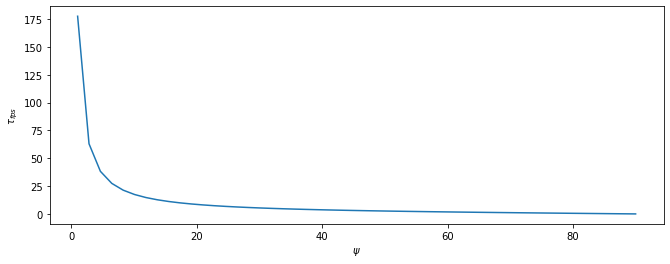

In [99]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sigma_1 = 3.1#np.linspace(0, 3.1, 50)
sigma_z = 0
psi = np.linspace(1 * np.pi/180, 89.99 * np.pi/180 , 50)#* np.pi/180
tau_0_val = get_tau_0(sigma_1, sigma_z, psi)
ax1.plot(psi * 180/np.pi, tau_0_val)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\psi}$')
ax1.set_ylabel(r'$\tau_{fps}}$')
#ax1.legend()
plt.savefig("D:\Shear zones\Python plots\shear sig z-0.25.pdf")

In [100]:
tau_0_val, sigma_1, psi * 180/np.pi

(array([1.77598881e+02, 6.30206494e+01, 3.82600145e+01, 2.74280835e+01,
        2.13423189e+01, 1.74374748e+01, 1.47147103e+01, 1.27043208e+01,
        1.11563238e+01, 9.92542892e+00, 8.92142318e+00, 8.08532944e+00,
        7.37696218e+00, 6.76799355e+00, 6.23787856e+00, 5.77135257e+00,
        5.35683586e+00, 4.98538371e+00, 4.64997599e+00, 4.34502480e+00,
        4.06602582e+00, 3.80930671e+00, 3.57184246e+00, 3.35111774e+00,
        3.14502289e+00, 2.95177429e+00, 2.76985277e+00, 2.59795531e+00,
        2.43495699e+00, 2.27988052e+00, 2.13187183e+00, 1.99018022e+00,
        1.85414216e+00, 1.72316794e+00, 1.59673065e+00, 1.47435693e+00,
        1.35561924e+00, 1.24012929e+00, 1.12753250e+00, 1.01750322e+00,
        9.09740588e-01, 8.03964963e-01, 6.99914787e-01, 5.97343810e-01,
        4.96018607e-01, 3.95716354e-01, 2.96222780e-01, 1.97330292e-01,
        9.88362015e-02, 5.41052074e-04]),
 3.1,
 array([ 1.        ,  2.81612245,  4.6322449 ,  6.44836735,  8.2644898 ,
        10.0806

In [35]:
sigma_x0_solve = sp.solve(sp.Eq(sigma_ps[0,0], sigma_ps_equiv_2[0,0]).subs(tau_0, tau_0_solve), sigma_x0)[0]
sigma_x0_solve

sigma_1 - sigma_1/tan(\psi)**2 + sigma_z0/tan(\psi)**2

In [36]:
psi = sp.Symbol(r'\psi')
sigma_1 = sp.Symbol('sigma_1')
get_sig_x0 = sp.lambdify((sigma_1, sigma_z0, psi), sigma_x0_solve, 'numpy')
get_sig_x0

<function _lambdifygenerated(sigma_1, sigma_z0, Dummy_34)>

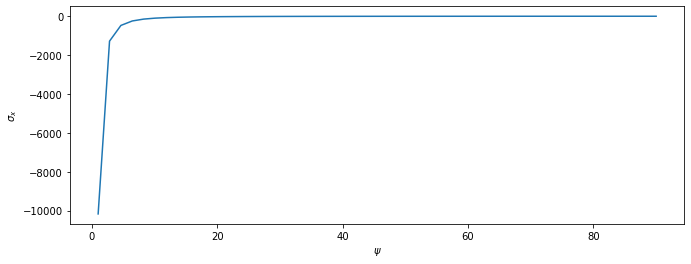

In [106]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sigma_1 = 3.1#np.linspace(0, 3.1, 50)
sigma_z = 0
psi = np.linspace(1 * np.pi/180, 90 * np.pi/180, 50) #* np.pi/180
sigma_x0_val = get_sig_x0(sigma_1, sigma_z, psi)
sigma_x0_val
ax1.plot(psi * 180/np.pi, sigma_x0_val)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\psi}$')
ax1.set_ylabel(r'$\sigma_{x}}$')
#ax1.legend()
plt.savefig("D:\Shear zones\Python plots\sig_x.pdf")

In [107]:
sigma_x0_val, psi * 180/np.pi

(array([-1.01715331e+04, -1.27787605e+03, -4.69019241e+02, -2.39530877e+02,
        -1.43804305e+02, -9.49653841e+01, -6.67312349e+01, -4.89531692e+01,
        -3.70406670e+01, -2.86715959e+01, -2.25688732e+01, -1.79829773e+01,
        -1.44504993e+01, -1.16724304e+01, -9.44883649e+00, -7.64192703e+00,
        -6.15424098e+00, -4.91527086e+00, -3.87299046e+00, -2.98833440e+00,
        -2.23151013e+00, -1.57947879e+00, -1.01420003e+00, -5.21386964e-01,
        -8.96087075e-02,  2.90366189e-01,  6.26056519e-01,  9.23633785e-01,
         1.18819954e+00,  1.42399814e+00,  1.63458144e+00,  1.82293753e+00,
         1.99159210e+00,  2.14268894e+00,  2.27805415e+00,  2.39924796e+00,
         2.50760646e+00,  2.60427566e+00,  2.69023921e+00,  2.76634119e+00,
         2.83330472e+00,  2.89174741e+00,  2.94219397e+00,  2.98508658e+00,
         3.02079342e+00,  3.04961547e+00,  3.07179208e+00,  3.08750520e+00,
         3.09688258e+00,  3.10000000e+00]),
 array([ 1.        ,  2.81632653,  4.6326530

### Global stress tensor
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{x0} & \tau_0 \\
\tau_0 & \sigma_{z0}
\end{array}
\right]
\end{align}

In [ ]:
# sigma_ij = sp.simplify(sp.Matrix([[sigma_x0_solve, tau_0_solve], 
#                             [tau_0_solve, sigma_z0]]))
# sigma_ij

### Ratio of principal stresses
\begin{equation}
\alpha = \frac{\sigma_1}{\sigma_2}
\end{equation}

In [ ]:
alpha = sigma_ps_equiv_1[0,0] / sigma_ps_equiv_1[1,1]
alpha

# Tensor formulation

In [ ]:
import sympy as sp
import numpy as np
sp.init_printing()

To simplify orientation, a the components of a general 2D stress tensor are introduced as follows

\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{yx} & \sigma_{yy}
\end{array}
\right] =
\left[
\begin{array}{cc}
\sigma_{x} & \tau^\mathrm{fps} \\
\tau^\mathrm{fps} & \sigma_{y}
\end{array}
\right]
\end{align}

The global stress components $\sigma_x$ and $\sigma_y$ are given based on the equilibrium conditions at the cross sectional level. The shear stress $\tau^\mathrm{fps}$ can be calculated either using a cross-sectional equilibrium or based on the compression-tension yield envelope. 

The crack is assumed to propagate along $\sigma_2$ and open along $\sigma_1$, i.e.
\begin{align}
\sigma_{12} =
\left[
\begin{array}{cc}
\sigma_1 & 0 \\
0 & \sigma_2
\end{array}
\right]
\end{align}

In [ ]:
tau_fps, sigma_x, sigma_y = sp.symbols(r'tau_fps, sigma_x, sigma_y')
sigma_1, sigma_2 = sp.symbols(r'sigma_1, sigma_2')
f_ct, f_cm = sp.symbols(r'f_ct, f_cm', nonnegative=True)

In [ ]:
sigma_xy = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, sigma_y]])
sigma_12 = sp.Matrix([[sigma_1, 0],
                      [0, sigma_2]])

In [ ]:
P_xy, D_xy = sigma_xy.diagonalize()
P_xy, D_xy

## Kupfer envelope on combined tension and compression

In [ ]:
Kupfer = sp.Eq(-sp.Rational(8,10) * sigma_1 / f_cm + sigma_2 / f_ct, 1)
Kupfer

In [ ]:
sigma_1_solved = sp.solve(Kupfer, sigma_1)[0]
sigma_1_solved

In [ ]:
sig_1_eq = sp.Eq(sigma_1_solved, D_xy[0,0])
sig_1_eq

In [ ]:
tau_fps_solved = sp.solve(sig_1_eq.subs(sigma_2, D_xy[1,1]), tau_fps)[0]

In [ ]:
tau_fps_solved

In [ ]:
tau_simplified = tau_fps_solved.subs(f_cm, 33.3).subs(f_ct, 3.1)
get_tau_fps = sp.lambdify((sigma_x, sigma_y), tau_simplified, 'numpy')

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sigma_x_fix = 1.57
sigma_y_var = np.linspace(0, 3, 100)
tau_fps_val = get_tau_fps(sigma_x_fix, sigma_y_var)
ax1.plot(sigma_y_var, tau_fps_val)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{y}}$')
ax1.set_ylabel(r'$\tau_{fps}}$')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\shear_fps_.pdf")

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sigma_y_fix = 0
sigma_x_var = np.linspace(0, 3, 100)
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
ax1.plot(sigma_x_var, tau_fps_val)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{x}}$')
ax1.set_ylabel(r'$\tau_{fps}}$')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\shear_fps_.pdf")

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(13,6))
sig_x_num = 10
sig_x_var = np.linspace(0, 3, sig_x_num)
sig_y_num = 10
sig_y_var = np.linspace(0, 3, sig_y_num)
tau_fps_val = np.zeros([sig_x_num, sig_y_num])
for j in range(len(sig_y_var)):
    # print('sigma_z =', sigma_z[j])
    for i in range(len(sig_x_var)):
        # print('tau_fpz =', tau_fpz[i])
        tau_fps = get_tau_fps(sig_x_var[i], sig_y_var[j])
        tau_fps_val[j, i] = tau_fps
    ax1.plot(sig_y_var, tau_fps_val[j,:])#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
    ax1.set_xlabel(r'$\sigma_{\mathrm{y}}$')
    ax1.set_ylabel(r'$\tau_{\mathrm{fpz}}$')
    #ax2.set_title(r'$\sigma_{\mathrm{x}} = constant$, and changing $\sigma_{\mathrm{y}}$')
#   ax1.legend()

In [ ]:
sigma_y_fix = 0
sigma_x_var = 3
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
tau_fps_val

In [ ]:
sigma_y_fix = 1
sigma_x_var = 3
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
tau_fps_val 

In [ ]:
sigma_y_fix = 1
sigma_x_var = 0
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
tau_fps_val 

In [ ]:
sigma_y_fix = 3
sigma_x_var = 0
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
tau_fps_val 

In [ ]:
sigma_y_fix = 1.0155263137082111
sigma_x_var = 1.3208937518187431
tau_fps_val = get_tau_fps(sigma_x_var, sigma_y_fix)
tau_fps_val 

In [ ]:
tau_fps_solved.subs({sigma_x:0, sigma_y:0, f_ct:3, f_cm:30})

In [ ]:
params = (sigma_x, sigma_y, f_ct, f_cm)

In [ ]:
get_tau_fps = sp.lambdify(params, tau_fps_solved, 'numpy')
get_tau_fps(3,0,3,30)

The consequence of using the Kupfer criterion for the determination of the shear stress at the crack tip is that the currently used evaluation of the critical strain cannot be calculated as 
$$
w_\mathrm{cr} = \frac{1}{E_\mathrm{cr}} \sigma_2 L_\mathrm{c}
$$
as done so far. The question is, if the currently used criterion 
on the principle stress direction could be modified to search for a consistent
value of the shear stress at the crack tip within the stress tensor. 
Then, $w_\mathrm{cr}$ could be expressed in terms of the stress state 
$$
 \varepsilon_{ab} = C_{abcd} \sigma_{cd} 
$$
The crack opening would be obtained as the principle strain distributed over a predefined length $L_\mathrm{c}$.

$$
\varepsilon_{12} = P_{ab} \varepsilon_{bc} P_{cd}
$$

$$
w_\mathrm{cr} = \varepsilon_{2} L_\mathrm{c}
$$

## Principle direction

In [ ]:
tau_fps, sigma_x, sigma_y = sp.symbols(r'tau_fps, sigma_x, sigma_y')
tau_fps, sigma_x, sigma_y = sp.symbols(r'tau_fps, sigma_x, sigma_y')
sigma_1, sigma_2 = sp.symbols(r'sigma_1, sigma_2')
f_ct, f_cm = sp.symbols(r'f_ct, f_cm', nonnegative=True)

In [ ]:
sigma_xy = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, sigma_y]])
sigma_12 = sp.Matrix([[sigma_1, 0],
                      [0, sigma_2]])

In [ ]:
P_xy, D_xy = sigma_xy.diagonalize()
P_xy, D_xy

In [ ]:
P_xy_tau = P_xy.subs(tau_fps, tau_fps_solved)
P_xy_tau

In [ ]:
theta_f = sp.atan( sp.simplify(-P_xy_tau[0,0] / P_xy_tau[1,0]))
theta_f

In [ ]:
#get_theta = sp.lambdify(params, theta_f, 'numpy')
get_theta = sp.lambdify((sigma_x, sigma_y, f_cm, f_ct), theta_f, 'numpy')

In [ ]:
#_, ax = plt.subplots(1,1)
# f_cm_, f_ct_ = 30, 3
# get_tau_fps(0,1,f_cm_,f_ct_)

In [ ]:
tau_fps_solved

In [ ]:
#theta = theta_f.subs(tau_fps, tau_fps_solved)
#theta

In [ ]:
#get_theta_ = sp.lambdify((sigma_x, sigma_y, f_cm, f_ct), theta, 'numpy')
#get_theta_

In [ ]:
get_theta(3, 0, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(1.47, 2, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(1.5, 1.5, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(0, 0, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(2, 0, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(1.3208937518187431,1.0155263137082111, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(1, 2, 33.3, 3.1) * 180/ np.pi

In [ ]:
get_theta(0, 3.1, 33.3, 3.1) * 180/ np.pi

In [ ]:
params = {
    f_cm : 33,
    f_ct : 3
}

In [ ]:
theta_simplify = sp.simplify(theta_f.subs(params))
theta_simplify

In [ ]:
get_theta = sp.lambdify((sigma_x, sigma_y), theta_simplify, 'numpy')
get_theta

In [ ]:
get_theta(0, 0) * 180/ np.pi

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sig_x_num = 10
sig_x_var_ = np.linspace(0.1, 3, sig_x_num)
sig_y_fix_ = 3
theta = get_theta(sig_x_var_, sig_y_fix_)
ax1.plot(sig_x_var, theta * 180 / np.pi)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{x}}$')
ax1.set_ylabel(r'$\theta}$')
ax1.legend()

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
sig_y_num = 100
sig_y_var = np.linspace(0.1, 3, sig_x_num)
sig_x_fix = 3
theta = get_theta(sig_x_fix, sig_y_var)
ax1.plot(sig_y_var,theta * 180/ np.pi)#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
ax1.set_xlabel(r'$\sigma_{\mathrm{y}}$')
ax1.set_ylabel(r'$\theta}$')
ax1.legend()


In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

sig_x_num = 10
sig_x_var = np.linspace(0, 3, sig_x_num)
sig_y_num = 10
sig_y_var = np.linspace(0, 3, sig_y_num)
theta = np.zeros([sig_x_num, sig_y_num])
for j in range(len(sig_y_var)):
    # print('sigma_z =', sigma_z[j])
    for i in range(len(sig_x_var)):
        # print('tau_fpz =', tau_fpz[i])
        theta_ = get_theta(sig_x_var[i], sig_y_var[j])
        theta[j, i] = theta_
    ax1.plot(sig_y_var[:],theta[j,:] * 180/np.pi, 'o-')#color='blue', label = r'$\sigma_{\mathrm{x}}[i]}$')
    ax1.set_xlabel(r'$\sigma_{\mathrm{y}}$')
    ax1.set_ylabel(r'$\theta}$')
    #ax2.set_title(r'$\sigma_{\mathrm{x}} = constant$, and changing $\sigma_{\mathrm{y}}$')
#     ax1.legend()

# Implementation 

 - Evaluate $\tau_\mathrm{fps}$ using the bi-axial stress envelope `crack_tip_stress/orientation`
 - Access the values of `f_t` and `f_c`
 - Control the w_cr in each iteration

## Provide an alternative model component for `crack_tip_shear_stress`.

- `CrackTipShearStressCSE`
- `CrackTipShearStressBAC`